In [1]:
# Import Libraries
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
# Loading data
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')
all_data = [train_df, test_df]

In [3]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [4]:
test_df.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.info()
print("_" * 50)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

In [7]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'] , axis = 1)


In [8]:
all_data = [train_df, test_df]

In [9]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


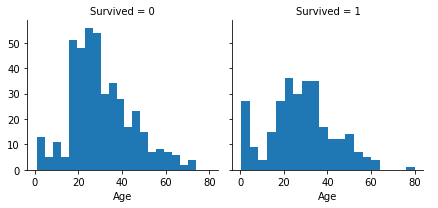

In [11]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)
g.add_legend();


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


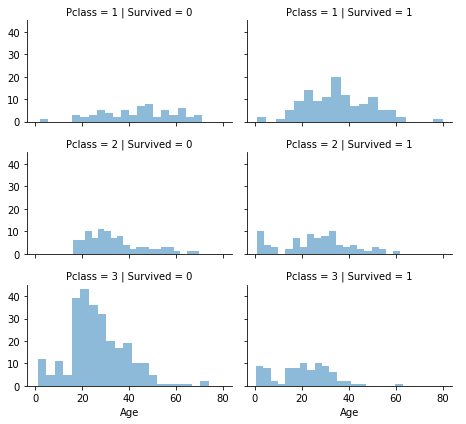

In [12]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [13]:
for dataset in all_data:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [14]:
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()


,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [15]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in all_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [16]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
all_data = [train_df, test_df]

In [17]:
for dataset in all_data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,2,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,2,35.0,0,0,8.0500,S,1


In [18]:
frequancey = train_df.Embarked.dropna().mode()[0]
frequancey

'S'

In [19]:
for dataset in all_data:
    dataset['Embarked'] = dataset['Embarked'].fillna(frequancey)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,2,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,2,35.0,0,0,8.0500,S,1


In [20]:
train_df[["Embarked" , "Survived"]].groupby("Embarked" , as_index = False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [21]:
train_df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [22]:
for dataset in all_data:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 1, 'C': 2, 'Q': 3} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,2,22.0,1,0,7.2500,1,1
1,1,1,1,38.0,1,0,71.2833,2,3
2,1,3,1,26.0,0,0,7.9250,1,2
3,1,1,1,35.0,1,0,53.1000,1,3
4,0,3,2,35.0,0,0,8.0500,1,1


In [23]:
train_df['Age'].fillna(test_df['Age'].dropna().median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].dropna().median(), inplace=True)
for dataset in all_data:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,2,1.0,1,0,7.2500,1,1
1,1,1,1,2.0,1,0,71.2833,2,3
2,1,3,1,1.0,0,0,7.9250,1,2
3,1,1,1,2.0,1,0,53.1000,1,3
4,0,3,2,2.0,0,0,8.0500,1,1


In [24]:
for dataset in all_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [25]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)


In [26]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [27]:
for dataset in all_data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
all_data = [train_df, test_df]
    


In [28]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,0,3,2,1.0,1,0,0,1,1,2
1,1,1,1,2.0,1,0,3,2,3,2
2,1,3,1,1.0,0,0,1,1,2,1
3,1,1,1,2.0,1,0,3,1,3,2
4,0,3,2,2.0,0,0,1,1,1,1
5,0,3,2,1.0,0,0,1,3,1,1
6,0,1,2,3.0,0,0,3,1,1,1
7,0,3,2,0.0,3,1,2,1,4,5
8,1,3,1,1.0,0,2,1,1,3,3
9,1,2,1,0.0,1,0,2,2,3,2


In [29]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,892,3,2,2.0,0,0,0,3,1,1
1,893,3,1,2.0,1,0,0,1,3,2
2,894,2,2,3.0,0,0,1,3,1,1
3,895,3,2,1.0,0,0,1,1,1,1
4,896,3,1,1.0,1,1,1,1,3,3
5,897,3,2,0.0,0,0,1,1,1,1
6,898,3,1,1.0,0,0,0,3,2,1
7,899,2,2,1.0,1,1,2,1,1,3
8,900,3,1,1.0,0,0,0,2,3,1
9,901,3,2,1.0,2,0,2,1,1,3


In [30]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

In [31]:
#----------------------------------------------------
#Applying RandomForestClassifier Model 
from sklearn.ensemble import RandomForestClassifier


RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=2,random_state=33) #criterion can be also : entropy 
RandomForestClassifierModel.fit(X_train, Y_train)

#Calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, Y_train))
print('----------------------------------------------------')

#Calculating Prediction
y_pred = RandomForestClassifierModel.predict(X_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(X_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])



RandomForestClassifierModel Train Score is :  0.8170594837261503
----------------------------------------------------
Predicted Value for RandomForestClassifierModel is :  [0 1 0 0 1 0 1 0 1 0]
Prediction Probabilities Value for RandomForestClassifierModel is :  [[0.84913561 0.15086439]
 [0.42090356 0.57909644]
 [0.80993976 0.19006024]
 [0.84338524 0.15661476]
 [0.41410836 0.58589164]
 [0.81481719 0.18518281]
 [0.41440172 0.58559828]
 [0.7336979  0.2663021 ]
 [0.41153912 0.58846088]
 [0.79068017 0.20931983]]


In [32]:
# Applying KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
print("Score of training data is  : " , knn.score(X_train , Y_train))
Y_pred = knn.predict(X_test)


Score of training data is  :  0.8641975308641975


In [33]:
#Import Libraries
from sklearn.neural_network import MLPClassifier
#----------------------------------------------------

#----------------------------------------------------
#Applying MLPClassifier Model 


MLPClassifierModel = MLPClassifier(activation='tanh', # can be also identity , logistic , relu
                                   solver='lbfgs',  # can be also sgd , adam
                                   learning_rate='constant', # can be also invscaling , adaptive
                                   early_stopping= False,
                                   alpha=0.0001 ,hidden_layer_sizes=(100, 3),random_state=33)
MLPClassifierModel.fit(X_train, Y_train)

#Calculating Details
print('MLPClassifierModel Train Score is : ' , MLPClassifierModel.score(X_train, Y_train))
print('MLPClassifierModel loss is : ' , MLPClassifierModel.loss_)
print('MLPClassifierModel No. of iterations is : ' , MLPClassifierModel.n_iter_)
print('MLPClassifierModel No. of layers is : ' , MLPClassifierModel.n_layers_)
print('MLPClassifierModel last activation is : ' , MLPClassifierModel.out_activation_)
print('----------------------------------------------------')

#Calculating Prediction
y_pred = MLPClassifierModel.predict(X_test)
y_pred_prob = MLPClassifierModel.predict_proba(X_test)
#print('Predicted Value for MLPClassifierModel is : ' , y_pred[:10])
#print('Prediction Probabilities Value for MLPClassifierModel is : ' , y_pred_prob[:10])

MLPClassifierModel Train Score is :  0.8664421997755332
MLPClassifierModel loss is :  0.3567574966950519
MLPClassifierModel No. of iterations is :  200
MLPClassifierModel No. of layers is :  4
MLPClassifierModel last activation is :  logistic
----------------------------------------------------


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [34]:
models = pd.DataFrame({
    'Model': [ 'KNeighborsClassifier',
              'RandomForestClassifier',
              'MLPClassifier'],
    'Score': [knn.score(X_train , Y_train) ,RandomForestClassifierModel.score(X_train, Y_train) , MLPClassifierModel.score(X_train, Y_train )]})
models.sort_values(by='Score', ascending=False)


,Model,Score
2,MLPClassifier,0.866442
0,KNeighborsClassifier,0.864198
1,RandomForestClassifier,0.817059


In [36]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": MLPClassifierModel.predict(X_test)
    })

In [38]:
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
